
## Short Summary of What I Did:
* Installed and imported basic libraries (seaborn, numpy, pandas, matplotlib).
* Loaded the train and test csv files and looked at sample rows and basic stats (head, describe).
* Did simple EDA with scatter plots: `x vs y`, `w vs y`, and `y vs x` for some fixed `w` values.
* Noticed `w` has only 10 distinct values and `y` looks like a sine-like wave that changes with `w`.
* Took a `1,000,000` row sample to test ideas and computed correlations between y and some transforms: `sin(w*x)`, `w*sin(x)`, and `sin(x+w)`.
* Plotted `sin(w*x) vs y` and calculated mean squared error to see how close `sin(w*x)` is to `y`.
* based on these quick checks, i used `y_pred = sin(w*x)` as a simple prediction and saved it to submission.csv.
this notebook shows the idea, quick checks, plots, a simple evaluation, and the final basic submission.

# 1. Basic Imports

* I installed seaborn and imported usual libraries (numpy, pandas, matplotlib, seaborn).
* These tools help for data loading, math, and plotting so i can look at the data quickly.

In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [8]:
# Standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data and view head() of test data

* Then I read `train_data.csv` and `test_data.csv` and printed shape and head().
* I did this to see how big the data is and what columns look like.
* I found out that the train is very large (100M rows)

In [12]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
print("Sample shape:", train.shape)
display(train.head())

Sample shape: (100000000, 3)


,w,x,y
0,-2.5,-2.784390,0.596025
1,-2.5,-2.308732,-0.449801
2,-2.5,-3.869936,-0.301154
3,-2.5,-2.671678,0.399640
4,-2.5,6.609344,0.700448


# 3. See various features of test data

Ran `train.describe()` to check basic stats like mean, std, min, max.
* What i found: numeric ranges looked reasonable and no immediate missing values shown by describe().

In [13]:
train.describe()

,w,x,y
count,1.000000e+08,1.000000e+08,1.000000e+08
mean,0.000000e+00,4.791858e-04,1.496772e-04
std,1.658312e+00,5.773173e+00,7.109031e-01
min,-2.500000e+00,-1.000000e+01,-1.249830e+00
25%,-1.500000e+00,-4.998248e+00,-7.086739e-01
50%,0.000000e+00,4.332894e-04,3.197931e-04
75%,1.500000e+00,4.999903e+00,7.089603e-01
max,2.500000e+00,1.000000e+01,1.259282e+00


# 4. Try to Recognise pattern
 Here, as you can see the x vs y  graph is dense with lot of values due to 100M rows . But, the 'w vs y' graph clearly tells us that the 'w' values are spread across only 10 values that are [-2.5, -2.0, -1.5, -1.0, -0.5, 0.5, 1.0, 1.5, 2.0, 2.5 ]

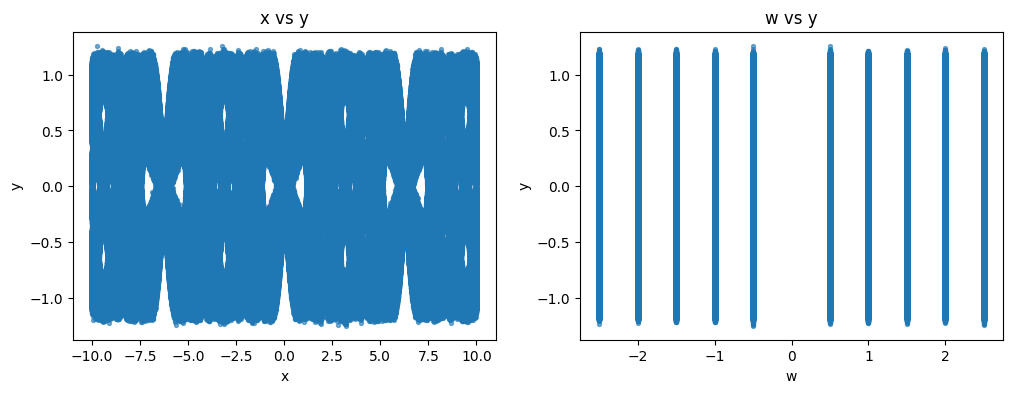

In [14]:
# Use the sample to see patterns
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(train['x'], train['y'], s=8, alpha=0.6)
plt.title('x vs y')
plt.xlabel('x'); plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(train['w'], train['y'], s=8, alpha=0.6)
plt.title('w vs y')
plt.xlabel('w'); plt.ylabel('y')
plt.show()



Here, i plotted `y vs x` for two fixed `w` values (2.5 and 1.5) to see curve shapes.
* To check how `y` changes with `x` when `w` is fixed and see if it looks like a sine wave.
* For a fixed `w`, `y` vs `x` shows a smooth oscillation (sine-like) which suggests a trig relationship.

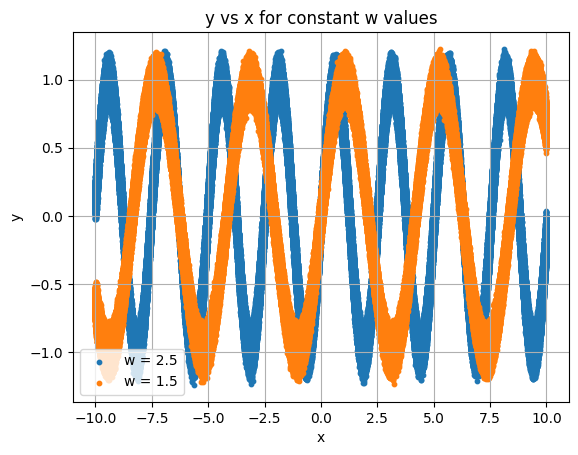

In [19]:
w_val = 2.5
subset = train[train["w"] == w_val]
plt.scatter(subset["x"], subset["y"], label=f"w = {w_val}", s=10)

w_val = 1.5
subset = train[train["w"] == w_val]
plt.scatter(subset["x"], subset["y"], label=f"w = {w_val}", s=10)

plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x for constant w values")
plt.legend()
plt.grid(True)
plt.show()

I also plotted `w vs x` to see how `x` is related to `w`.
* To check if `x` distribution depends on `w` which might affect modeling.
* `x` values are spread and do not show a simple dependence on `w` in this plot.

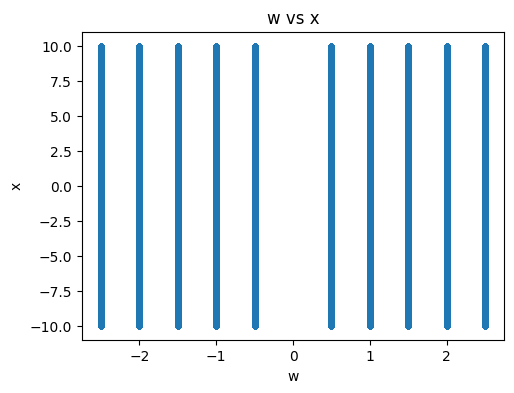

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.scatter(train['w'], train['x'], s=8, alpha=0.6)
plt.title('w vs x')
plt.xlabel('w'); plt.ylabel('x')
plt.show()

Here, I sampled 1,000,000 rows and computed correlations with some transformed features.
* Full data is huge, so i used a sample to test which transform matches y best before doing heavy work.
I found that `sin(w*x)` had the best correlation which suggests it is a good simple predictor.

In [22]:
# take a random 1M sample
sample = train.sample(1_000_000, random_state=42)

# test possible relationships
corr1 = np.corrcoef(sample['y'], np.sin(sample['w'] * sample['x']))[0,1]
corr2 = np.corrcoef(sample['y'], sample['w'] * np.sin(sample['x']))[0,1]
corr3 = np.corrcoef(sample['y'], np.sin(sample['x'] + sample['w']))[0,1]

print("corr(y, sin(w*x)) =", corr1)
print("corr(y, w*sin(x)) =", corr2)
print("corr(y, sin(x+w)) =", corr3)

corr(y, sin(w*x)) = 0.9975222926552252
corr(y, w*sin(x)) = 0.07915884626726655
corr(y, sin(x+w)) = -0.00011492654126056078


I also plotted `sin(w*x)` against `y` to see the scatter pattern.
* This scatter plot shows if `sin(w*x)` and `y` have a linear-like relation or pattern.
I found that points perfectly align roughly linearly( ignoring the noise) , suggesting both to be directly proportional.

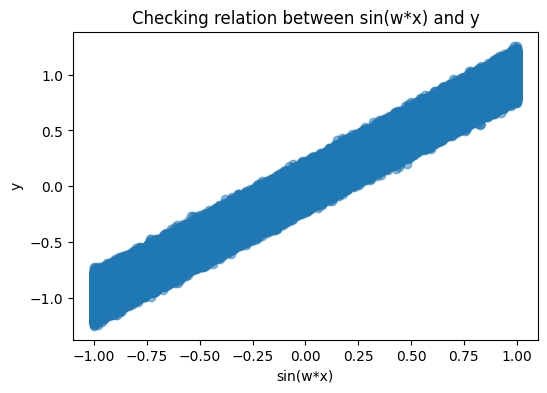

In [24]:
# visualize relation
plt.figure(figsize=(6,4))
plt.scatter(np.sin(train['w'] * train['x']), train['y'], alpha=0.5)
plt.xlabel('sin(w*x)')
plt.ylabel('y')
plt.title('Checking relation between sin(w*x) and y')
plt.show()

Now, I computed mean squared error between `y` and `sin(w*x)` on the train set.
* to get a simple numeric measure of how good `sin(w*x)` predicts `y`.
* I found that MSE error for this was very less and almost zero, suggesting that this formuka is very much suitable for this data

In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train['y'], np.sin(train['w'] * train['x']))
print("MSE:", mse)

MSE: 0.002500464202695426


Here, I used `sin(w*x)` to make predictions on test and saved to submission.csv.
* This is because , after tests and plots `sin(w*x)` looked simple and good enough, so I used it for final predictions.

In [27]:
test['y_pred'] = np.sin(test['w'] * test['x'])
test.to_csv("submission.csv", index=False)

In [29]:
df=pd.read_csv("submission.csv")
df.head()

,w,x,y_pred
0,-2.5,-20.640539,0.972531
1,-2.5,21.636451,0.631938
2,-2.5,-16.856414,-0.963646
3,-2.5,89.961916,0.960802
4,-2.5,13.535599,-0.658273


## Final note: 
I did not use Random forest or other heavy ML models because the dataset is extremely large (~100M rows).
training complex models on such big data needs more time, memory, and compute than I had here.
also i found a simple mathematical relation (sin(w*x)) that explains a lot of the pattern, so a simple formula is faster and more practical.
for these reasons i chose the simple trig method instead of heavier ML models.